In [1]:
#import des fichiers et load des ressources
import functions
import pandas as pd
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
# import warnings
# from sklearn.exceptions import ConvergenceWarning
# warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
data = pd.read_csv('cleaned_data.csv')
pd.options.display.max_columns = data.shape[1]

In [3]:
#initialisation des valeurs explicatives et dépendantes
X = ['ENERGYSTARScore','Ancienneté','NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFABuilding(s)'] + list(
    data.filter(regex='^(LargestPropertyUseType_|Neighborhood_)').columns)
y = 'TotalGHGEmissions'
# Données d'entraînement et test
X_train, X_test, y_train, y_test = functions.train_test_split_data(data, X, y)

In [4]:
#standardisation
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)
X_train_std_df = pd.DataFrame(X_train_std, columns=X_train.columns)

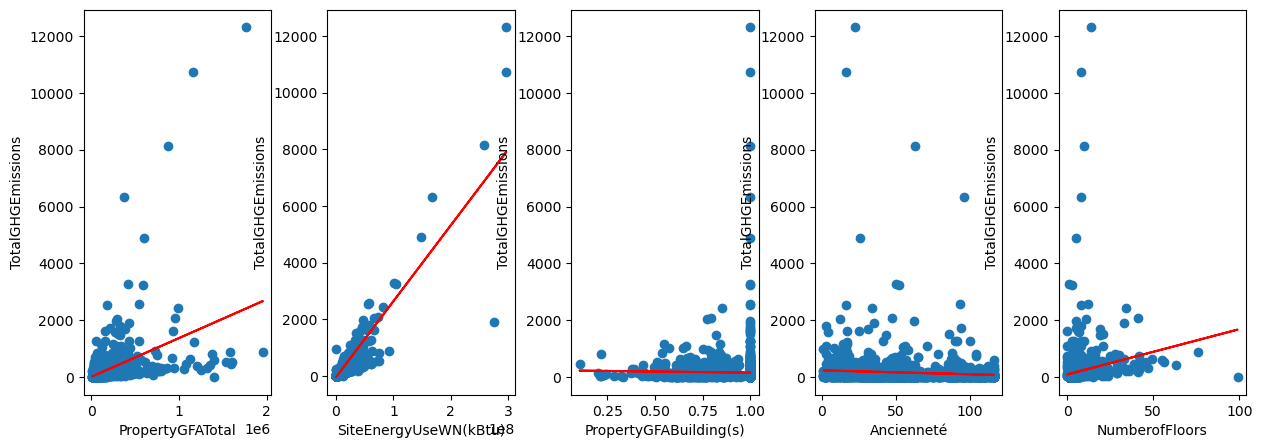

In [5]:
# quelques analyses bivariées
columns = ['PropertyGFATotal', 'SiteEnergyUseWN(kBtu)', 'PropertyGFABuilding(s)', 'Ancienneté', 'NumberofFloors']
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))
for i, col in enumerate(columns):
    functions.showScatterPlot(data, col, y, ax=axes[i])
plt.subplots_adjust(wspace=0.3)
plt.show()

In [6]:
X_train_std_df

,ENERGYSTARScore,Ancienneté,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,LargestPropertyUseType_Adult Education,LargestPropertyUseType_Automobile Dealership,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_College/University,LargestPropertyUseType_Convention Center,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Fire Station,LargestPropertyUseType_Fitness Center/Health Club/Gym,LargestPropertyUseType_Food Service,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_Lifestyle Center,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Movie Theater,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Museum,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility
0,0.340526,0.139372,-0.078163,-0.547283,-0.273808,0.452337,-0.185695,-0.05712,-0.168606,-0.049447,-0.134952,0.0,-0.554184,-0.05712,-0.285997,-0.521512,-0.311825,-0.314954,-0.194871,-0.289310,4.495208,-0.075655,-0.040357,-0.144038,-0.144038,-0.028525,-0.049447,-0.049447,-0.107299,0.0,-0.028525,-0.040357,-0.190331,-0.049447,-0.028525,-0.05712,0.0,-0.080911,-0.230396,-0.160795,-0.099258,-0.05712,-0.040357,-0.063888,-0.149813,-0.028525,-0.075655,-0.05712,-0.388083,-0.689072,-0.251186,-0.049447,-0.121867,-0.05712,-0.049447,-0.040357,-0.131794,0.0,-0.05712,-0.040357,-0.05712,-0.134952,-0.040357,-0.028525,-0.028525,-0.028525,-0.049447,-0.090536,-0.063888,-0.118384,-0.028525,-0.085855,-0.274180,-0.138042,-0.114802,-0.085855,-0.063888,6.324555,-0.040357,0.0,-0.222459
1,-0.022045,0.199776,-0.078163,-0.375471,-0.498969,0.452337,-0.185695,-0.05712,-0.168606,-0.049447,-0.134952,0.0,-0.554184,-0.05712,-0.285997,1.917500,-0.311825,-0.314954,-0.194871,-0.289310,-0.222459,-0.075655,-0.040357,-0.144038,-0.144038,-0.028525,-0.049447,-0.049447,-0.107299,0.0,-0.0

Text(0.5, 0.98, 'Histogrammes des caractéristiques')

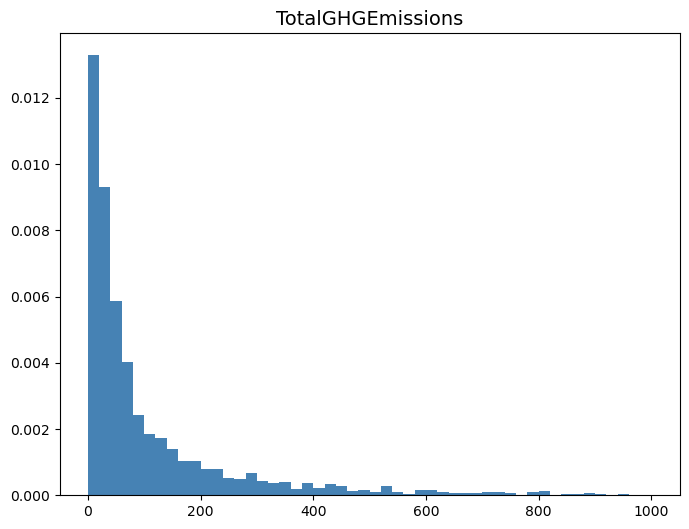

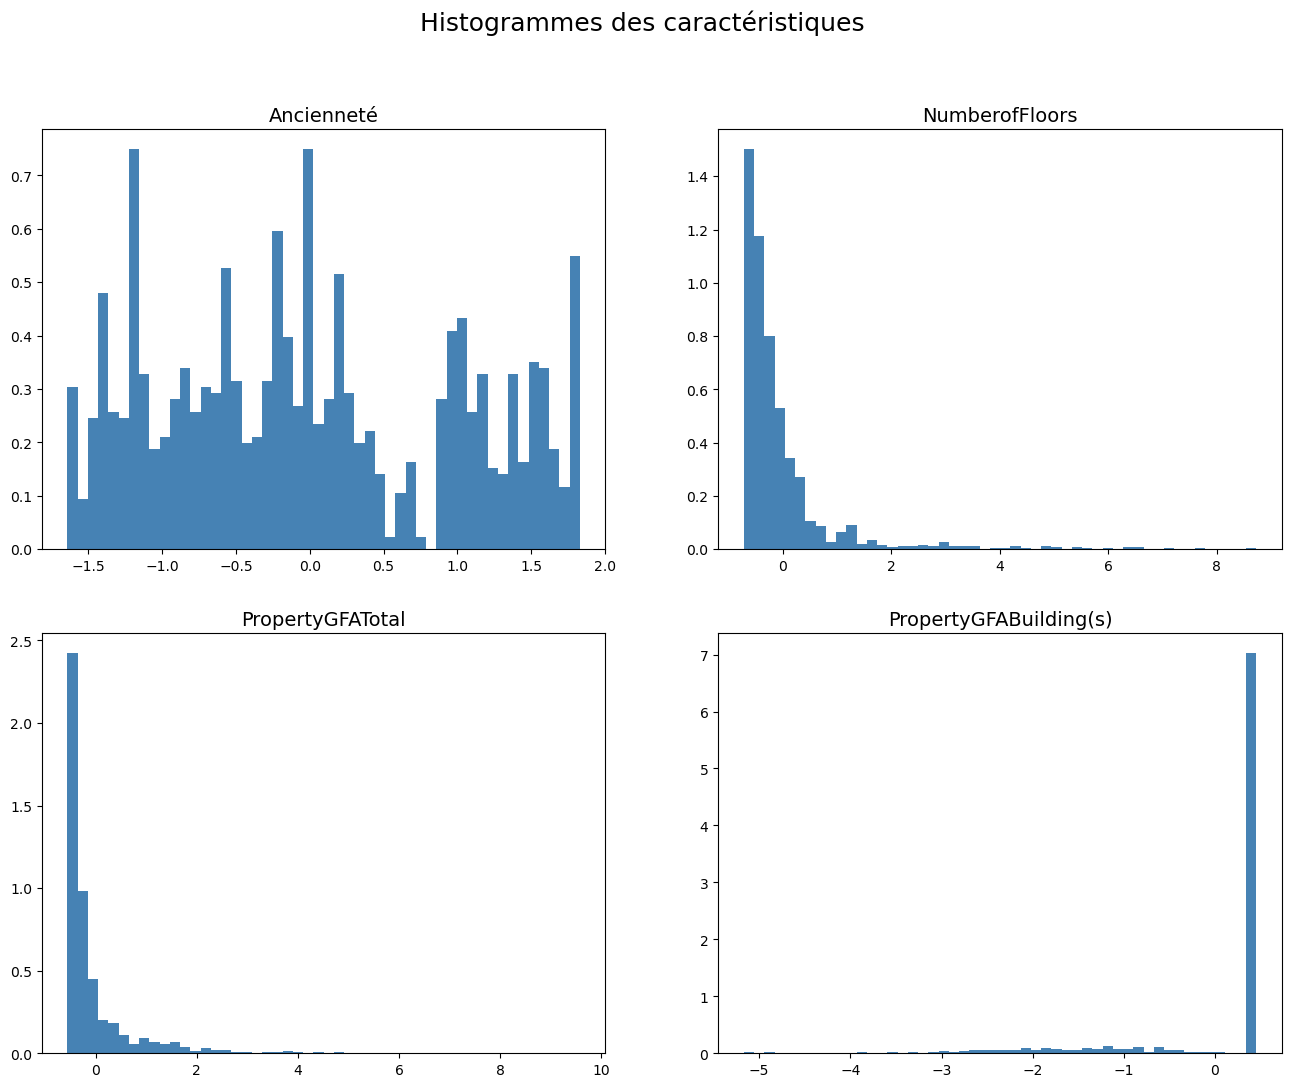

In [7]:
#distribution
fig, ax = plt.subplots(figsize=(8,6))
cols_to_use = ['Ancienneté', 'NumberofFloors','PropertyGFATotal','PropertyGFABuilding(s)']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
h = ax.hist(data[y], bins=50, color='steelblue', density=True, edgecolor='none', range=[0,1000])
ax.set_title(y, fontsize=14)
for col, ax in zip(cols_to_use, axes.flatten()):
    h = ax.hist(X_train_std_df[col], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(col, fontsize=14)
fig.suptitle('Histogrammes des caractéristiques', fontsize=18)




In [8]:
#dummy_regressor
mse = functions.evaluate_model(DummyRegressor(), X_train_std, X_test_std, y_train, y_test)[1]
print("DummyRegressor MSE:", mse)

DummyRegressor MSE: 357.9240514136584


In [13]:
models = [LinearRegression(),
          Lasso(),
          ElasticNet(),
          DecisionTreeRegressor(),
          Ridge(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          AdaBoostRegressor(),
          KNeighborsRegressor(),
          SVR()]

param_grids = [
               {'fit_intercept': [True, False]},
               {'alpha': [0.1, 1, 10], 'positive': [True, False]},
               {'alpha': [0.1, 1, 10], 'l1_ratio': [0.25, 0.5, 0.75], 'positive': [True, False]},
               {'max_depth': [2, 5, 10]},
               {'alpha': [0.1, 1, 10], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']},
               {'n_estimators': [100, 500, 1000], 'max_depth': [2, 5, 10], 'criterion': ['gini','entropy']},
               {'n_estimators': [100, 500, 1000], 'learning_rate': [0.01, 0.1, 1]},
               {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'loss': ['linear', 'square', 'exponential']},
               {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']},
               {'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto']}]


In [10]:
for model, param_grid in zip(models, param_grids):
    if isinstance(model, KNeighborsClassifier):
        scoring = 'accuracy'
    else:
        scoring = 'neg_mean_squared_error'
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring)
    grid_search.fit(X_train_std, y_train)
    best_model, mse = functions.evaluate_model(grid_search.best_estimator_, X_train_std, X_test_std, y_train, y_test)
    print(type(model).__name__, "MSE:", mse)

LinearRegression MSE: 1041422541078433.2
Lasso MSE: 325.32421917399427
ElasticNet MSE: 286.0619152270712
DecisionTreeRegressor MSE: 388.84448208973134
Ridge MSE: 355.0954596026401
RandomForestRegressor MSE: 260.1897443815493
GradientBoostingRegressor MSE: 327.15872532020256
AdaBoostRegressor MSE: 394.57729462125434
KNeighborsRegressor MSE: 250.74846901324173
SVR MSE: 355.68465666226444


In [11]:
model = RandomForestRegressor()
model.fit(X_train_std,y_train)

RandomForestRegressor()

In [12]:
best_model, mse = functions.evaluate_model(model, X_train_std, X_test_std, y_train, y_test)
mse

288.4662373746807

Index(['ENERGYSTARScore', 'Ancienneté', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFABuilding(s)', 'Neighborhood_BALLARD',
       'Neighborhood_Ballard', 'Neighborhood_CENTRAL', 'Neighborhood_Central',
       'Neighborhood_DELRIDGE', 'Neighborhood_DELRIDGE NEIGHBORHOODS',
       'Neighborhood_DOWNTOWN', 'Neighborhood_Delridge', 'Neighborhood_EAST',
       'Neighborhood_GREATER DUWAMISH', 'Neighborhood_LAKE UNION',
       'Neighborhood_MAGNOLIA / QUEEN ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_North', 'Neighborhood_Northwest',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST',
       'LargestPropertyUseType_Adult Education',
       'LargestPropertyUseType_Automobile Dealership',
       'LargestPropertyUseType_Bank Branch',
       'LargestPropertyUseType_College/University',
       'LargestPropertyUseType_Convention Center',
       'LargestPropertyUseType_Courthouse',
       'Large

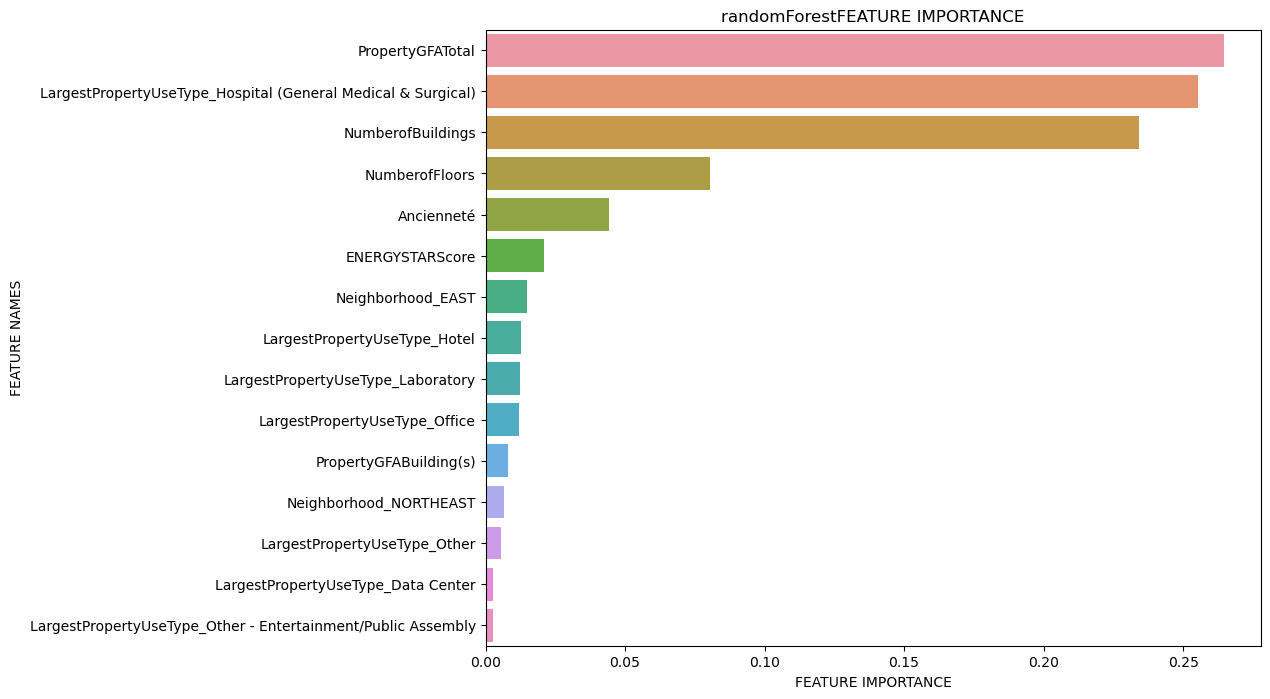

In [24]:
import numpy as np
import seaborn as sns

def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df = fi_df.head(15)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


plot_feature_importance(model.feature_importances_,X_train_std_df.columns,'randomForest')
